In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the data set
symptoms=pd.read_csv("D:\Detecting parkinsons disease\parkinsons.data")
symptoms.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#columns
symptoms.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
#independent variables
x=symptoms.drop(['status','name'],axis=1)

#dependent variable
y=symptoms['status']

In [5]:
#splitting the data set into training and test data set 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier 
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [7]:
#predicting the results
y_pred=classifier.predict(x_test)
pd.DataFrame({'actual status':y_test,"predicted status:":y_pred})

,actual status,predicted status:
83,1,1
12,1,1
33,0,0
113,1,1
171,0,1
134,1,1
163,1,1
124,1,1
74,1,1
18,1,1


In [8]:
#Model Evaluation

In [9]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
conf_mat= confusion_matrix(y_test, y_pred) 
conf_mat

array([[ 9,  2],
       [ 1, 37]], dtype=int64)

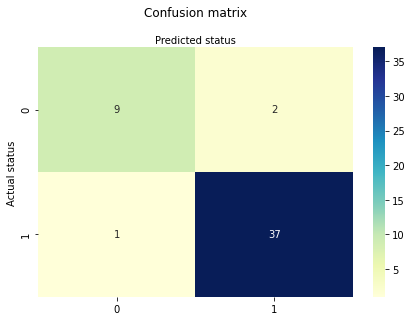

In [10]:
import seaborn as sns
#Heatmap for confusionmatrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual status')
plt.xlabel('Predicted status')
plt.savefig("HeatMap")

In [11]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy_score is :",accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy_score is : 93.87755102040816
Precision: 94.87179487179486
Recall: 97.36842105263158


In [12]:
#LogLoss
from sklearn.metrics import log_loss
logLoss=log_loss(y_test,y_pred)
print("Logloss: %.2f" % (logLoss))

Logloss: 2.11


AUC - Test Set: 95.33%


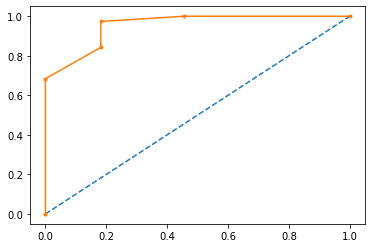

In [13]:
#ROC
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = classifier.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [14]:
#F score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.961039
